<a href="https://colab.research.google.com/github/phudo0605/AI/blob/main/HW5/Problem2_Optimization_Crashworthiness_Design_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2:  Optimization for Crashworthiness Design of Vehicles**

For the safety of a vehicle, the protection against the effect of a frontal colision is very important. There are 5 design parameters (variables) of the vehicle body contributing in this safety, as showed in the figures below:

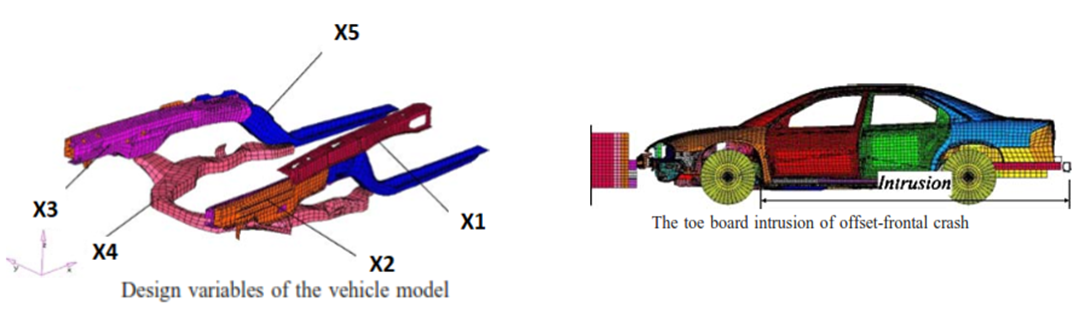

To minimize the effect of accident, a three-objective problem needs to be evaluated:
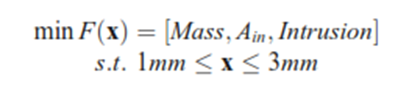

where three objective functions are:
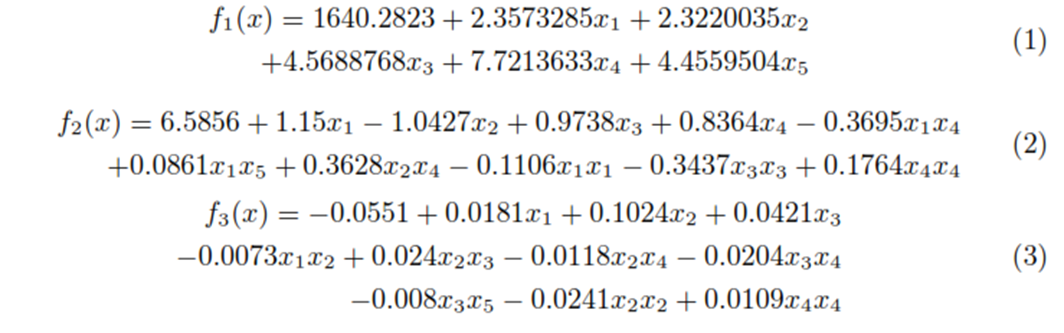


Each of function considers different factors:
f1: vehicle mass,
f2: integration of collision in the full frontal crash
f3: the toe  board intrusion in the offset frontal crash

We are going to use the genetic algorithm in R to perform the minimization for the above 3 objective function.
The following codes are applied to install and load necessary packages, libraries used to perform GA on the objectives.

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

# Loading the needed libraries

library(GA)
library(plotly)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -558.6848 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.240004 1.503396 1.604486 1.078066 1.226749

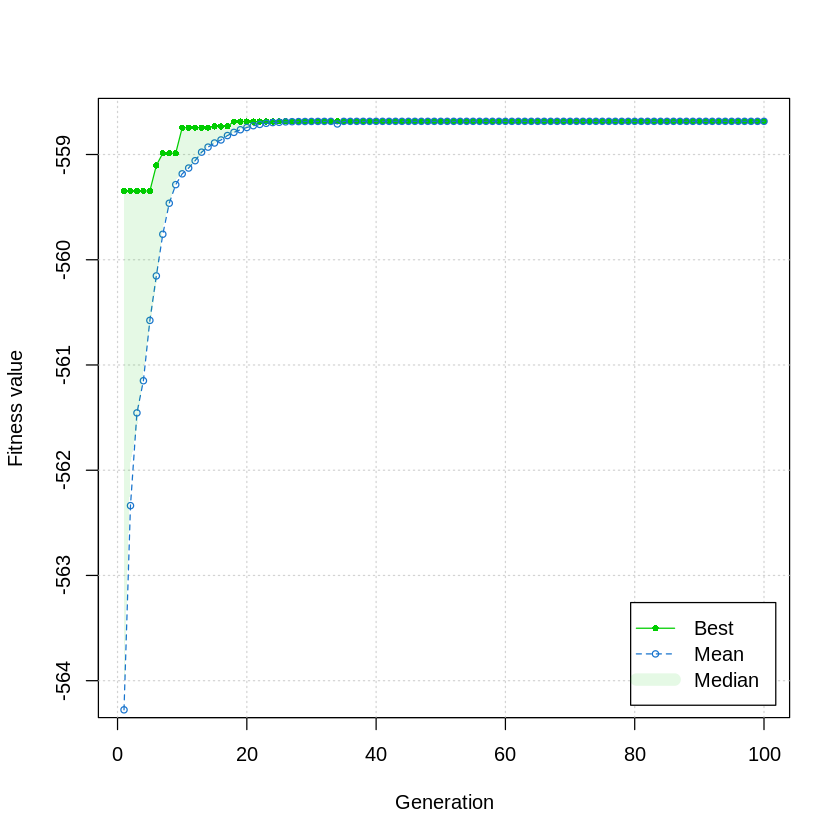

In [5]:
#  Define the function to be optimized together with dimension constraints
# 3 objectives functions are combined into one function f= a*f1+b*f2+c*f3
# where a, b and c are the degrees of importance associated with f1, f2 and f3, respectively.
# Based on the estimated weight of each objective in the function f, we can adjust the values of a, b & c as long as a+b+c=1.
# Because the GA only perform maximization. Knowing that minimization of (f) equals to maximization of (-f).
# Therefore, we set a, b and c as negative numbers, a+b+c = -1, to have final (-f) before running the algorithm.
# Below is the first case where a=b=c= -0.333 (all objectives are equally important)
f <- function(x){
  f1 <- 1640.2823 + 2.3573285*x[1] + 2.3220035*x[2] +4.5688768*x[3] +
    7.7213633*x[4] + 4.4559504*x[5]

  f2 <- 6.5856 + 1.15*x[1] - 1.0427*x[2] + 0.9738*x[3] + 0.8364*x[4] -
    0.3695*x[1]*x[4] + 0.0861*x[1]*x[5] + 0.3628*x[2]*x[4] -
    0.1106*x[1]^2 - 0.3437*x[3]^2 + 0.1764*x[4]^2

  f3 <- -0.0551 + 0.0181*x[1] + 0.1024*x[2] + 0.0421*x[3] -
    0.0073*x[1]*x[2] + 0.024*x[2]*x[3] - 0.0118*x[2]*x[4] -
    0.0204*x[3]*x[4] - 0.008*x[3]*x[5] - 0.0241*x[2]^2 + 0.0109*x[4]^2

  return(a*f1 + b*f2 + c*f3)
}


# Set lower & upper bound; step size determines precision
x1 = seq(1, 3, by = 0.01)
x2 = seq(1, 3, by = 0.01)
x3 = seq(1, 3, by = 0.01)
x4 = seq(1, 3, by = 0.01)
x5 = seq(1, 3, by = 0.01)

a = -0.3333
b = -0.3333
c = -0.3333

# Applied Genetic Algorithm, summarize and plot the results
GA = ga(type = "real-valued",
        fitness = f,
        lower = c(1.0, 1.0, 1.0, 1.0, 1.0), upper = c(3.0, 3.0, 3.0, 3.0, 3.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)


In order to have a better look at how each objective is optimized separately  in the function, we consider some other cases as below:

a=-1, b=0, c=0: we just minimize the vehicle mass

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -1666.729 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.387476 1.350865 1.123128 1.265447 1.152739

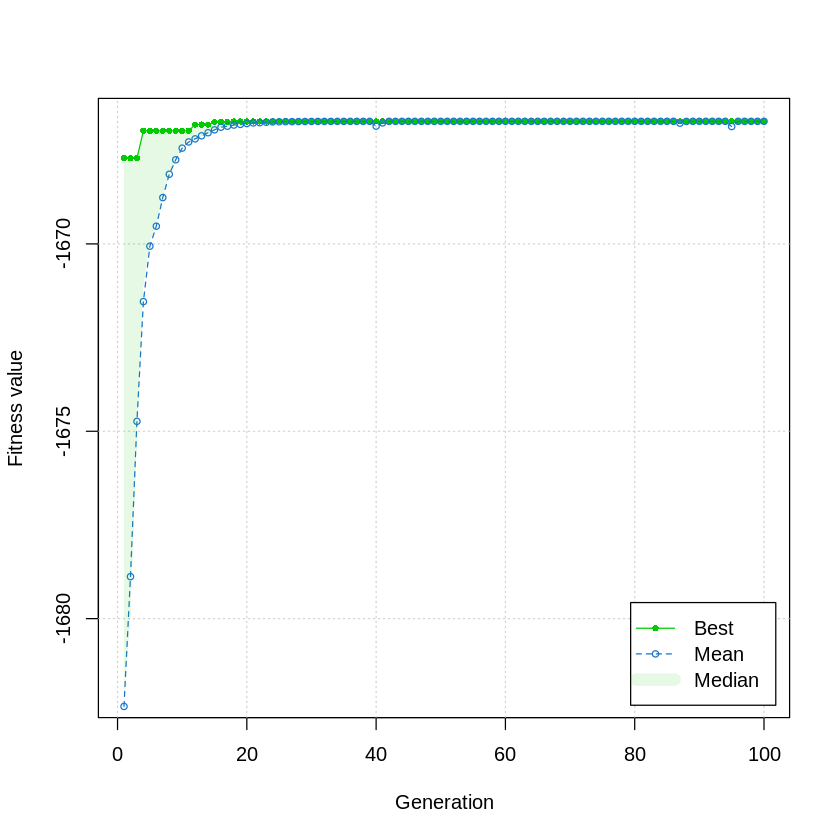

In [10]:
f <- function(x){
  f1 <- 1640.2823 + 2.3573285*x[1] + 2.3220035*x[2] +4.5688768*x[3] +
    7.7213633*x[4] + 4.4559504*x[5]

  f2 <- 6.5856 + 1.15*x[1] - 1.0427*x[2] + 0.9738*x[3] + 0.8364*x[4] -
    0.3695*x[1]*x[4] + 0.0861*x[1]*x[5] + 0.3628*x[2]*x[4] -
    0.1106*x[1]^2 - 0.3437*x[3]^2 + 0.1764*x[4]^2

  f3 <- -0.0551 + 0.0181*x[1] + 0.1024*x[2] + 0.0421*x[3] -
    0.0073*x[1]*x[2] + 0.024*x[2]*x[3] - 0.0118*x[2]*x[4] -
    0.0204*x[3]*x[4] - 0.008*x[3]*x[5] - 0.0241*x[2]^2 + 0.0109*x[4]^2

  return(a*f1 + b*f2 + c*f3)
}


# Set lower & upper bound; step size determines precision
x1 = seq(1, 3, by = 0.01)
x2 = seq(1, 3, by = 0.01)
x3 = seq(1, 3, by = 0.01)
x4 = seq(1, 3, by = 0.01)
x5 = seq(1, 3, by = 0.01)

a = -1
b = 0
c = 0

# Applied Genetic Algorithm, summarize and plot the results
GA = ga(type = "real-valued",
        fitness = f,
        lower = c(1.0, 1.0, 1.0, 1.0, 1.0), upper = c(3.0, 3.0, 3.0, 3.0, 3.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)


a=0, b=-1, c=0: minimize the collision acceleration

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -7.31614 
Solution = 
          x1       x2       x3       x4       x5
[1,] 1.57923 2.338691 2.898637 1.089036 2.098221

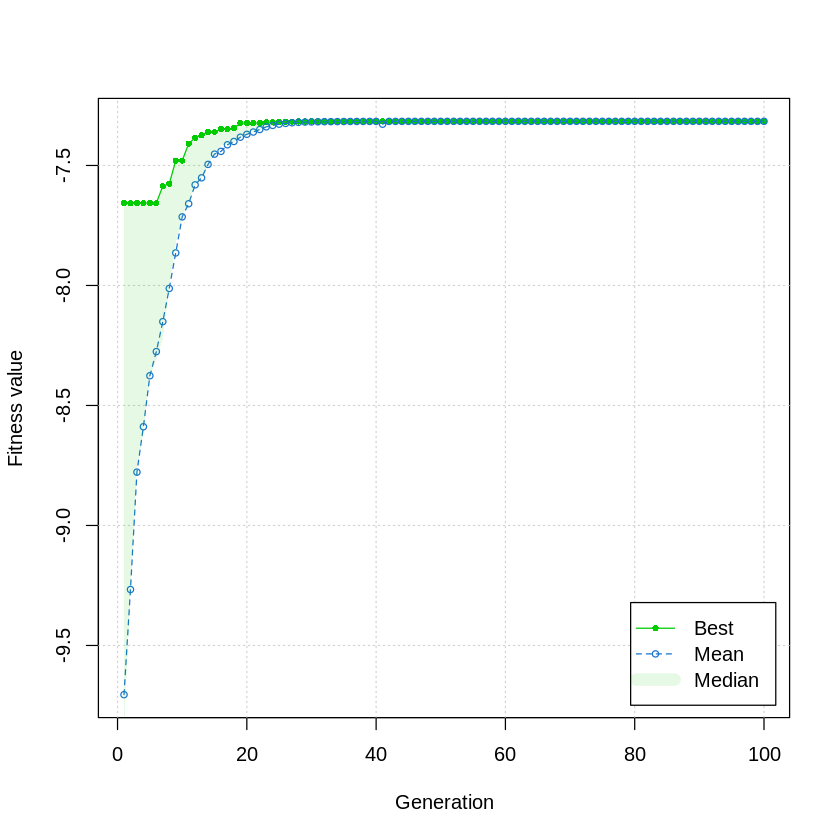

In [11]:
f <- function(x){
  f1 <- 1640.2823 + 2.3573285*x[1] + 2.3220035*x[2] +4.5688768*x[3] +
    7.7213633*x[4] + 4.4559504*x[5]

  f2 <- 6.5856 + 1.15*x[1] - 1.0427*x[2] + 0.9738*x[3] + 0.8364*x[4] -
    0.3695*x[1]*x[4] + 0.0861*x[1]*x[5] + 0.3628*x[2]*x[4] -
    0.1106*x[1]^2 - 0.3437*x[3]^2 + 0.1764*x[4]^2

  f3 <- -0.0551 + 0.0181*x[1] + 0.1024*x[2] + 0.0421*x[3] -
    0.0073*x[1]*x[2] + 0.024*x[2]*x[3] - 0.0118*x[2]*x[4] -
    0.0204*x[3]*x[4] - 0.008*x[3]*x[5] - 0.0241*x[2]^2 + 0.0109*x[4]^2

  return(a*f1 + b*f2 + c*f3)
}


# Set lower & upper bound; step size determines precision
x1 = seq(1, 3, by = 0.01)
x2 = seq(1, 3, by = 0.01)
x3 = seq(1, 3, by = 0.01)
x4 = seq(1, 3, by = 0.01)
x5 = seq(1, 3, by = 0.01)

a = 0
b = -1
c = 0

# Applied Genetic Algorithm, summarize and plot the results
GA = ga(type = "real-valued",
        fitness = f,
        lower = c(1.0, 1.0, 1.0, 1.0, 1.0), upper = c(3.0, 3.0, 3.0, 3.0, 3.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)

a=0, b=0, c=-1: consider only the toe board intrusion

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -0.06168674 
Solution = 
           x1       x2       x3       x4     x5
[1,] 2.684012 2.901652 1.179179 2.458511 2.4894

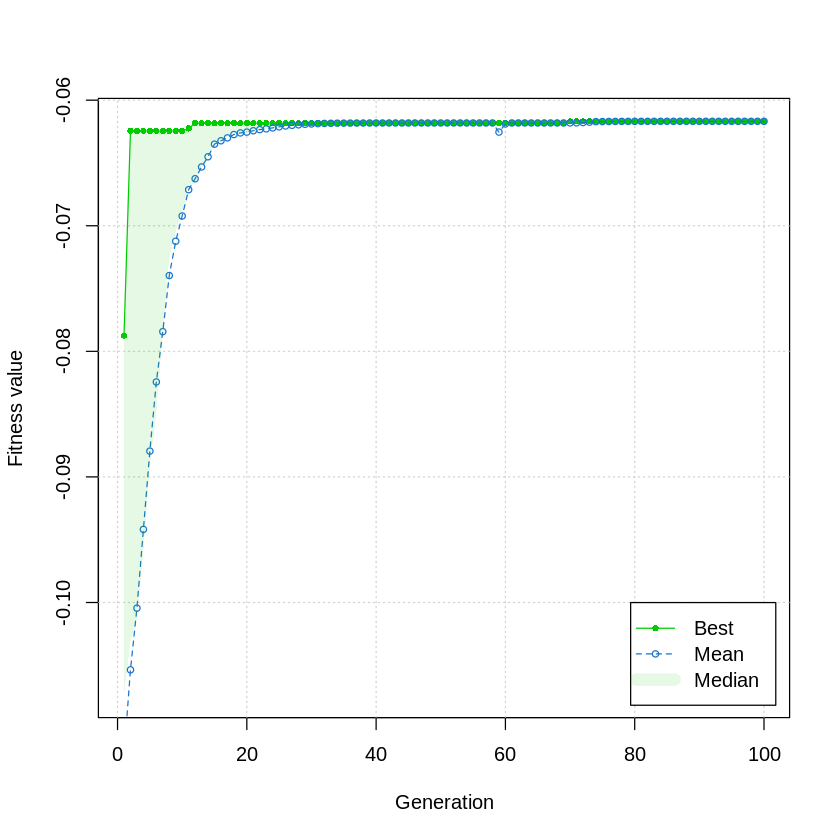

In [13]:
f <- function(x){
  f1 <- 1640.2823 + 2.3573285*x[1] + 2.3220035*x[2] +4.5688768*x[3] +
    7.7213633*x[4] + 4.4559504*x[5]

  f2 <- 6.5856 + 1.15*x[1] - 1.0427*x[2] + 0.9738*x[3] + 0.8364*x[4] -
    0.3695*x[1]*x[4] + 0.0861*x[1]*x[5] + 0.3628*x[2]*x[4] -
    0.1106*x[1]^2 - 0.3437*x[3]^2 + 0.1764*x[4]^2

  f3 <- -0.0551 + 0.0181*x[1] + 0.1024*x[2] + 0.0421*x[3] -
    0.0073*x[1]*x[2] + 0.024*x[2]*x[3] - 0.0118*x[2]*x[4] -
    0.0204*x[3]*x[4] - 0.008*x[3]*x[5] - 0.0241*x[2]^2 + 0.0109*x[4]^2

  return(a*f1 + b*f2 + c*f3)
}


# Set lower & upper bound; step size determines precision
x1 = seq(1, 3, by = 0.01)
x2 = seq(1, 3, by = 0.01)
x3 = seq(1, 3, by = 0.01)
x4 = seq(1, 3, by = 0.01)
x5 = seq(1, 3, by = 0.01)

a = 0
b = 0
c = -1

# Applied Genetic Algorithm, summarize and plot the results
GA = ga(type = "real-valued",
        fitness = f,
        lower = c(1.0, 1.0, 1.0, 1.0, 1.0), upper = c(3.0, 3.0, 3.0, 3.0, 3.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)

solutions in different cases:
Case1: a=b=c=-0.3333: 03 objectives equally considered
x1=1.240004, x2=1.503396, x3=1.604486, x4=1.078066, x5=1.226749;  

Case2: a=-1, b=c=0: minimize the vehicle mass
x1=1.387476, x2=1.350865, x3=1.123128, x4=1.265447, x5=1.152739;

Case 3: a=c=0, b=-1: minimize the collision acceleration
x1=1.57923, x2=2.338691, x3=2.898637, x4=1.089036, x5=2.098221

Case 4: a=b=0, c=-1: minimize the toe board intrusion
x1=2.684012, x2=2.901652, x3=1.179179, x4=2.458511, x5=2.4894

From above summary, we can see that if we want to have a collision deceleration (f2) or an intrusion reduction(f3), the vehicle body must be reinforced by increasing the thickness at some places in the body. Therefore, x values are greater in case 3 and 4 as compared to case 1 and 2.